In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bank = pd.read_csv("hmelq.csv")
bank = bank.dropna() 
bank.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [2]:
print(bank.describe().T)

          count           mean           std       min         25%        50%  \
bad      2018.0       0.088206      0.283665      0.00      0.0000      0.000   
loan     2018.0   19010.257681  10768.607345   1700.00  12000.0000  16900.000   
mortdue  2018.0   76337.035183  44476.368189   5076.00  49577.2500  67595.000   
value    2018.0  106899.244797  54026.707096  23031.00  71287.2500  94514.000   
yoj      2018.0       9.003964      7.573012      0.00      3.0000      7.000   
derog    2018.0       0.150149      0.580421      0.00      0.0000      0.000   
delinq   2018.0       0.264123      0.789816      0.00      0.0000      0.000   
clage    2018.0     180.645020     84.420116      0.49    118.2050    176.670   
ninq     2018.0       1.037661      1.578414      0.00      0.0000      0.000   
clno     2018.0      22.265114      9.457238      0.00     16.0000     21.000   
debtinc  2018.0      34.105829      8.438411      4.03     29.2955     34.949   

                 75%       

In [3]:
def describeColumn(columnName):
    print("Mean:", bank[columnName].mean())
    print("Median: ", bank[columnName].median())
    print("Mode: ", bank[columnName].mode())
    print("Standard Deviation: ",bank[columnName].std())
    print("Sum: ", bank[columnName].sum())
    print("Count: ", bank[columnName].count())
    print("Min: ", bank[columnName].min())
    print("Max: ", bank[columnName].max())
    print("Abs: ", bank[columnName].abs())
    print("Prod: ", bank[columnName].prod())
    print("Cum sum : ", bank[columnName].cumsum())
    print("Cum prod: ", bank[columnName].cumprod())

In [4]:
colums=['loan','mortdue','value','yoj','clage','ninq','clno','debtinc']
for c in colums:
    describeColumn(c)

Mean: 19010.25768087215
Median:  16900.0
Mode:  0    10600
1    11000
2    12900
3    13900
4    15200
dtype: int64
Standard Deviation:  10768.60734485882
Sum:  38362700
Count:  2018
Min:  1700
Max:  89900
Abs:  153     18200
154     21700
155     34100
156      8400
157     17400
158     23900
159     19700
160     17300
161     11700
162     25300
163     11300
164     12000
165     17400
166     15800
167      9800
168     25900
169      8500
170     21800
171     28400
172     14300
173     19800
174     15200
175     12300
176     18200
177     32400
178     19500
179     32300
180     21800
181     17000
182     22600
        ...  
3411    32000
3412    27700
3413    26800
3414    22800
3415     9300
3416    20300
3417    15200
3418    23300
3419     8200
3420    21900
3421    20900
3422    42400
3424    42800
3425     5500
3426    13900
3428    36600
3519    28900
3520    18200
3521     5100
3522    27200
3523     9000
3524     6900
3525    16300
3542    20500
3543    38000
3544

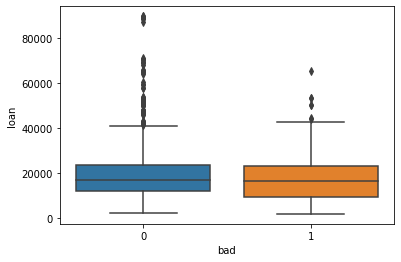

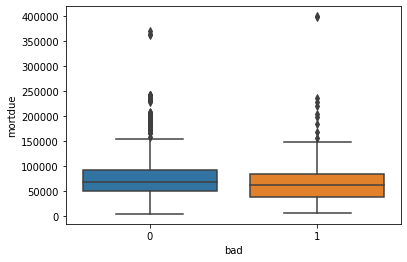

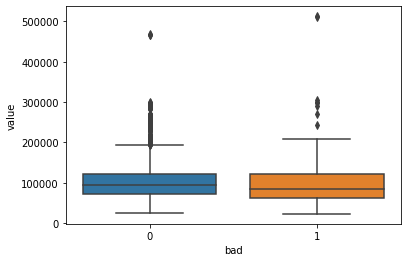

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x = "bad", y = "loan", data = bank)
plt.show()
sns.boxplot(x = "bad", y = "mortdue", data = bank)
plt.show()
sns.boxplot(x = "bad", y = "value", data = bank)
plt.show()

In [6]:
# SHAPIRO
from scipy.stats import shapiro
def shapiroTest(columnName):
    stat, p  = shapiro(bank[columnName]) 
    print("Statistics=%.3f, p=%.3f" % (stat,p))
    alpha = 0.05
    if p > alpha:
        print("Örneklem normal dağılımından gelmektedir")
    else:
        print("Örneklem normal dağılımından gelmemektedir")
        
for column in bank.columns:
    if(column != 'reason' and column != 'job' and column != 'bad'):
        print(column)
        shapiroTest(column)
        print()


loan
Statistics=0.836, p=0.000
Örneklem normal dağılımından gelmemektedir

mortdue
Statistics=0.862, p=0.000
Örneklem normal dağılımından gelmemektedir

value
Statistics=0.844, p=0.000
Örneklem normal dağılımından gelmemektedir

yoj
Statistics=0.912, p=0.000
Örneklem normal dağılımından gelmemektedir

derog
Statistics=0.277, p=0.000
Örneklem normal dağılımından gelmemektedir

delinq
Statistics=0.380, p=0.000
Örneklem normal dağılımından gelmemektedir

clage
Statistics=0.905, p=0.000
Örneklem normal dağılımından gelmemektedir

ninq
Statistics=0.669, p=0.000
Örneklem normal dağılımından gelmemektedir

clno
Statistics=0.964, p=0.000
Örneklem normal dağılımından gelmemektedir

debtinc
Statistics=0.824, p=0.000
Örneklem normal dağılımından gelmemektedir



In [7]:
# LEVENE
from scipy.stats import levene
def leveneTest(column):
    stat, p = levene(bank[column][bank['bad'] == 0], bank[column][bank['bad'] == 1])
    print("Statistics=%.3f, p=%.3f" % (stat,p))
    alpha = 0.05
    if p > alpha:
        print("Örneklem normal dağılımından gelmektedir")
    else:
        print("Örneklem normal dağılımından gelmemektedir")
        
for column in bank.columns:
    if(column != 'reason' and column != 'job' and column != 'bad'):
        print(column)
        leveneTest(column)
        print()

loan
Statistics=2.395, p=0.122
Örneklem normal dağılımından gelmektedir

mortdue
Statistics=2.307, p=0.129
Örneklem normal dağılımından gelmektedir

value
Statistics=3.991, p=0.046
Örneklem normal dağılımından gelmemektedir

yoj
Statistics=4.210, p=0.040
Örneklem normal dağılımından gelmemektedir

derog
Statistics=118.586, p=0.000
Örneklem normal dağılımından gelmemektedir

delinq
Statistics=172.844, p=0.000
Örneklem normal dağılımından gelmemektedir

clage
Statistics=0.008, p=0.927
Örneklem normal dağılımından gelmektedir

ninq
Statistics=19.275, p=0.000
Örneklem normal dağılımından gelmemektedir

clno
Statistics=9.247, p=0.002
Örneklem normal dağılımından gelmemektedir

debtinc
Statistics=115.704, p=0.000
Örneklem normal dağılımından gelmemektedir

